In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)
#pd.options.display.max_colwidth = 300
#pd.options.display.max_columns = 300
#pd.options.display.max_rows = 300

In [105]:
df1=pd.read_csv("train_cl.csv")
df2=pd.read_csv("test_cl.csv")
df3=pd.read_csv("val_cl.csv")
df = pd.concat([df1, df2, df3], axis=0, sort=False, ignore_index=True)

In [106]:
df.head()

,Json_id,Label,statement,subject_data,speaker,speaker_job_title,state_info,party_affiliation,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location),Description
0,2635.json,FALSE,say anni list polit group support third trimes...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,mailer,premis fail back anni list make bone comfort c...
1,10540.json,half-true,declin coal start start natur ga took start be...,energy history job-accomplishments,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,floor speech,surovel said declin coal start natur ga took s...
2,324.json,mostly-true,hillari clinton agre john mccain vote give geo...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,denver,obama said would vote amend present though cli...
3,1123.json,FALSE,health care reform legisl like mandat free sex...,health-care,blog-posting,Others,Others,none,7.0,19.0,3.0,5.0,44.0,news releas,releas may point mikulski comment could open d...
4,9028.json,half-true,econom turnaround start end term,economy jobs,charlie-crist,Others,Florida,democrat,15.0,9.0,20.0,19.0,2.0,interview cnn,crist said econom turnaround start end term cr...


In [107]:
# Let us get some basic stats #
print("Total Number of records : ", df.shape[0])
print("Number of uniques speakers : ", len(df.speaker.unique()))
print("Number of uniques speaker_job_title : ", len(df.speaker_job_title.unique()))
print("Number of uniques party_affiliation : ", len(df.party_affiliation.unique()))
print("Number of uniques state : ", len(df.state_info.unique()))


Total Number of records :  12791
Number of uniques speakers :  3310
Number of uniques speaker_job_title :  1356
Number of uniques party_affiliation :  25
Number of uniques state :  86


In [108]:
df.isnull().sum(axis=0)

Json_id                    0
Label                      0
statement                  0
subject_data               0
speaker                    0
speaker_job_title          0
state_info                 0
party_affiliation          2
Barely_true_count          0
False_count                0
Half_true_count            0
Mostly_true_count          0
Fire_counts                0
Context(value/location)    0
Description                0
dtype: int64

# Data Cleaning


In [109]:
#Filling in missing values
df['speaker_job_title'].fillna("Others", inplace=True)
df['state_info'].fillna("Others", inplace=True)
df['Context(value/location)'].fillna("Others", inplace=True)
df['speaker'].fillna("none", inplace=True)
df['party_affiliation'].fillna("Others", inplace=True)
df['Barely_true_count'].fillna(0.0, inplace=True)
df['False_count'].fillna(0.0, inplace=True)
df['Half_true_count'].fillna(0.0, inplace=True)
df['Mostly_true_count'].fillna(0.0, inplace=True)
df['Fire_counts'].fillna(0.0, inplace=True)
df['subject_data'].fillna("none", inplace=True)
df['Description'].fillna("Others", inplace=True)



In [110]:
df.isnull().sum(axis=0)

Json_id                    0
Label                      0
statement                  0
subject_data               0
speaker                    0
speaker_job_title          0
state_info                 0
party_affiliation          0
Barely_true_count          0
False_count                0
Half_true_count            0
Mostly_true_count          0
Fire_counts                0
Context(value/location)    0
Description                0
dtype: int64

The dataset is balanced

In [111]:
from collections import Counter
speaker_job_title_list = df.speaker_job_title.values

from collections import Counter
wordsDict = Counter(speaker_job_title_list)
wordsDictSorted = wordsDict.most_common()
wordsDictSorted = dict(wordsDictSorted)

wordsDictSorted

{'Others': 3567,
 'President': 615,
 'U.S. Senator': 595,
 'Governor': 487,
 'President-Elect': 343,
 'U.S. senator': 328,
 'Presidential candidate': 314,
 'Former governor': 212,
 'U.S. Representative': 210,
 'Senator': 193,
 'Milwaukee County Executive': 183,
 'State Senator': 140,
 'U.S. representative': 130,
 'U.S. House of Representatives': 118,
 'Attorney': 110,
 'Governor of New Jersey': 104,
 'Social media posting': 100,
 'Congressman': 99,
 'State representative': 89,
 'Co-host on CNN\'s "Crossfire"': 88,
 'State Representative': 86,
 'U.S. Congressman': 82,
 'Speaker of the House of Representatives': 72,
 'Governor of Ohio as of Jan. 10, 2011': 67,
 'Congresswoman': 66,
 'State senator': 60,
 'state senator': 53,
 'Candidate for U.S. Senate and physician': 52,
 'governor': 50,
 'state representative': 49,
 'U.S. senator from Ohio': 47,
 'U.S. Representative, Florida District 23': 47,
 'Lieutenant governor': 46,
 'House Majority Leader': 45,
 'Businessman': 45,
 'author': 44,


In [112]:
# reducing / Cleaning speaker_job_title
def merge(temp):
    if ('state' in temp) or ('speaker' in temp) or ('council' in temp) or ('u.s. house' in temp) or ('u.s. rep.' in temp) or ('assemblywoman' in temp) or ('secretary' in temp) or ('treasurer' in temp) or ('chairman' in temp) or ('minister' in temp) or ('county executive' in temp) or ( 'senator' in temp) or ( 'senate' in temp) or ('congress' in temp) or ('house' in temp) or ('congressman' in temp) or ('representative' in temp) or ('councilor' in temp):
        return 'state_deligate'
    elif ('governor' in temp) or ('mayor' in temp)  or ('general' in temp)  :
        return 'governor'
    elif ('columnist' in temp) or ('former' in temp) or ('republican' in temp) or ('political commentator' in temp) or ('political party' in temp): 
        return 'opposition'    
    elif ('president' in temp):
        return 'president'
    elif ('board member' in temp) or ('manager' in temp) or ('district' in temp) or ('advoca' in temp) or ('adviser' in temp) or ('sheriff' in temp) or ('committee' in temp): 
        return 'organization'
    elif ('radio' in temp) or ('commentator' in temp) or('reporter' in temp) or ('host' in temp) or ('column' in temp) or ('blogger' in temp)  or ('tv' in temp) or ('cnn\'s' in temp) or ('cnn' in temp) or ('media' in temp) or ('news' in temp) or ('debate' in temp) or ('address' in temp) or ('interview' in temp) or ('speech' in temp):
        return 'media'
    elif ('tweet' in temp) or ('facebook' in temp) or('instag' in temp) or ('meme' in temp) or ('blog' in temp) or ('email' in temp) :
        return 'social_media'   
    elif ('deli owner' in temp) or ('physician' in temp) or ('developer' in temp) or ('farmer' in temp) or ('pharmacist' in temp)  or ('homemaker' in temp) or ('analyst' in temp) or ('business' in temp) or ('rally' in temp) or ('comment' in temp) or ('businessman' in temp) or ('mother' in temp) :
        return 'civilians'
    elif ('author' in temp) or ('ceo' in temp) or ('actor' in temp) or ('lawyer' in temp) or ('attorney' in temp) or ('judge' in temp) or ('philanthropist' in temp) or ('group' in temp) or ('writer' in temp) or ('filmmaker' in temp)or ('leader' in temp) or ('geologist' in temp) or ('director' in temp) or ('consultant' in temp) or ('activist' in temp) or ('superintendent' in temp) or ('commissioner' in temp) or ('musician' in temp) or ('professor' in temp) or ('founder' in temp) or ('candidate' in temp):
        return 'influencial_people'
    else:
        return 'others'


df['speaker_job_title']= df.speaker_job_title.apply(lambda x : x.lower() if type(x) == str else '')
df['speaker_job_title'] = df['speaker_job_title'].apply(merge)


In [113]:
print("Number of uniques speaker_job_title : ", len(df.speaker_job_title.unique()))

Number of uniques speaker_job_title :  10


In [114]:
#frequent_speakers = df['speaker'].value_counts()[:20].reset_index().to_dict()['index']

from collections import Counter
speaker_list = df.speaker.values

from collections import Counter
wordsDict = Counter(speaker_list)
wordsDictSorted = wordsDict.most_common()
wordsDictSorted = dict(wordsDictSorted)

wordsDictSorted

{'barack-obama': 611,
 'donald-trump': 343,
 'hillary-clinton': 297,
 'mitt-romney': 212,
 'john-mccain': 189,
 'scott-walker': 183,
 'chain-email': 178,
 'rick-perry': 173,
 'marco-rubio': 153,
 'rick-scott': 150,
 'ted-cruz': 118,
 'bernie-s': 106,
 'chris-christie': 104,
 'facebook-posts': 100,
 'charlie-crist': 90,
 'newt-gingrich': 83,
 'blog-posting': 81,
 'jeb-bush': 79,
 'joe-biden': 76,
 'paul-ryan': 70,
 'john-boehner': 68,
 'john-kasich': 67,
 'sarah-palin': 66,
 'michele-bachmann': 61,
 'rick-santorum': 59,
 'tim-kaine': 54,
 'national-republican-congressional-committee': 52,
 'rand-paul': 52,
 'nathan-deal': 52,
 'rudy-giuliani': 47,
 'rob-portman': 47,
 'debbie-wasserman-schultz': 47,
 'ron-johnson': 46,
 'greg-abbott': 43,
 'david-dewhurst': 41,
 'bill-clinton': 41,
 'mike-huckabee': 41,
 'ron-paul': 40,
 'bob-mcdonnell': 39,
 'mike-pence': 39,
 'rush-limbaugh': 37,
 'eric-cantor': 36,
 'democratic-national-committee': 35,
 'republican-party-florida': 34,
 'democratic-co

In [115]:
from collections import Counter
state_info_list = df.state_info.values

from collections import Counter
wordsDict = Counter(state_info_list)
wordsDictSorted = wordsDict.most_common()
wordsDictSorted = dict(wordsDictSorted)

wordsDictSorted

{'Others': 2749,
 'Texas': 1260,
 'Florida': 1231,
 'Wisconsin': 900,
 'New York': 829,
 'Illinois': 692,
 'Ohio': 586,
 'Georgia': 545,
 'Virginia': 512,
 'Rhode Island': 452,
 'Oregon': 307,
 'New Jersey': 305,
 'Massachusetts': 250,
 'Arizona': 228,
 'California': 180,
 'Washington, D.C.': 141,
 'Vermont': 117,
 'Pennsylvania': 112,
 'New Hampshire': 107,
 'Arkansas': 103,
 'Kentucky': 98,
 'Tennessee': 88,
 'Maryland': 86,
 'Delaware': 84,
 'Alaska': 81,
 'Minnesota': 75,
 'North Carolina': 72,
 'Nevada': 58,
 'Indiana': 52,
 'Missouri': 49,
 'South Carolina': 39,
 'New Mexico': 37,
 'Louisiana': 33,
 'Colorado': 29,
 'Michigan': 28,
 'Connecticut': 27,
 'Utah': 27,
 'Iowa': 22,
 'Kansas': 18,
 'Oklahoma': 18,
 'Alabama': 18,
 'Washington, D.C. ': 15,
 'District of Columbia': 14,
 'West Virginia': 10,
 'Washington': 9,
 'Georgia ': 7,
 'Florida ': 6,
 'Massachusetts ': 6,
 'Washington state': 6,
 'Wyoming': 4,
 'California ': 4,
 'Colorado ': 4,
 'South Dakota': 4,
 'ohio': 3,
 'Il

In [116]:
from collections import Counter
party_affiliation_list = df.party_affiliation.values

from collections import Counter
wordsDict = Counter(party_affiliation_list)
wordsDictSorted = wordsDict.most_common()
wordsDictSorted = dict(wordsDictSorted)

wordsDictSorted

{'republican': 5665,
 'democrat': 4137,
 'none': 2181,
 'organization': 264,
 'independent': 180,
 'newsmaker': 64,
 'libertarian': 51,
 'journalist': 49,
 'activist': 45,
 'columnist': 44,
 'talk-show-host': 32,
 'state-official': 24,
 'labor-leader': 15,
 'business-leader': 11,
 'tea-party-member': 10,
 'education-official': 3,
 'green': 3,
 'constitution-party': 3,
 'Others': 2,
 'government-body': 2,
 'county-commissioner': 2,
 'liberal-party-canada': 1,
 'Moderate': 1,
 'democratic-farmer-labor': 1,
 'ocean-state-tea-party-action': 1}

In [117]:
y_labels= {'TRUE':1,
         'mostly-true':2,
         'half-true':3,
         'barely-true':4,
         'pants-fire':5,
         'FALSE':6}

y= df.Label.map(y_labels)
y


0        6
1        3
2        2
3        6
4        3
        ..
12786    3
12787    2
12788    1
12789    6
12790    4
Name: Label, Length: 12791, dtype: int64

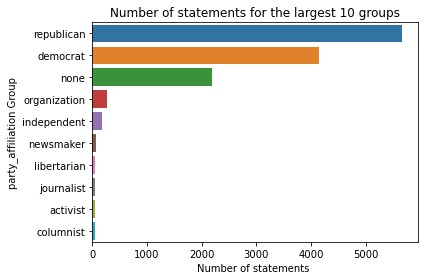

In [118]:
def group_and_count(df, groupby_column, with_pct=False, with_avg=False):
    result = df.groupby(groupby_column).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
    if with_pct:
        result['count_pct'] = result['count'] / result['count'].sum()
    if with_avg:
        result['count_avg'] = result['count'].mean()
    return result

sns.barplot(data=group_and_count(df, 'party_affiliation')[:10], y='party_affiliation', x='count')
plt.xlabel('Number of statements ')
plt.ylabel('party_affiliation Group')
plt.title('Number of statements for the largest 10 groups')
plt.tight_layout()
plt.savefig('nb_statements_10_largest_groups.png')

In [119]:
# as a result we will keep only four party:Republican, Democrat, none and others.
pp=['republican', 'democrat', 'none']
df['party_affiliation'] = df['party_affiliation'].apply(lambda x : x if x in pp else 'other_parties')

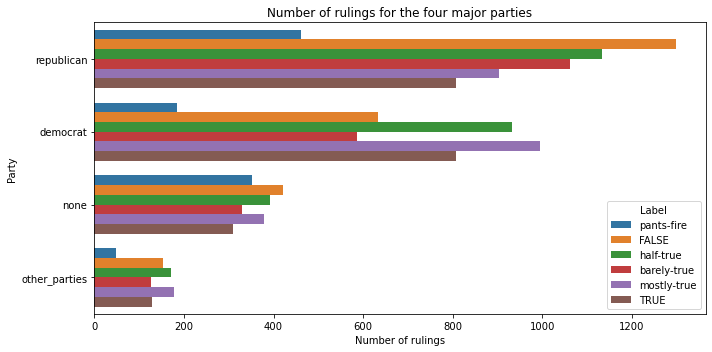

In [120]:
parties_of_interest = ['republican', 'democrat','other_parties','none']
truhometer_labels = ['pants-fire', 'FALSE', 'half-true','barely-true', 'mostly-true', 'TRUE']

plt.figure(figsize=(10, 5))
sns.barplot(data=group_and_count(df.loc[df.party_affiliation.isin(parties_of_interest), :], ['party_affiliation', 'Label']), y='party_affiliation', x='count', hue='Label', hue_order=truhometer_labels)
plt.xlabel('Number of rulings')
plt.ylabel('Party')
plt.title('Number of rulings for the four major parties')
plt.tight_layout()
plt.savefig('nb_rulings_for_major_parties.png')

In [121]:
# present top subject data that are used most

#https://github.com/mikanikos/Features-of-Lies/blob/master/Data_Analysis.ipynb


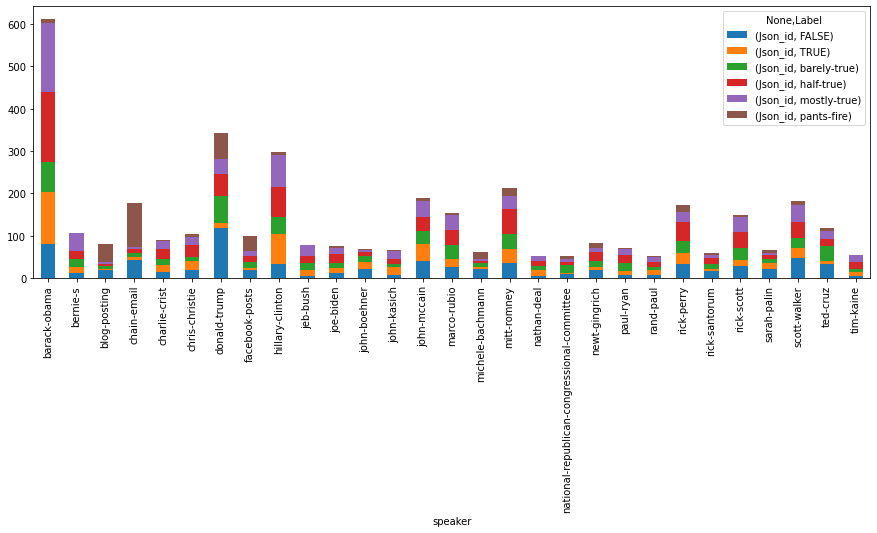

In [122]:
#Speakers whose statement count is more than 50 are taken into consideration

def by_label(df, column):
    return df.groupby([column,"Label"]).agg({"Json_id" : "count"})

speakers_cts = df.groupby("speaker").statement.count()
speakers = speakers_cts[speakers_cts > 50]
speakers_df = df[df['speaker'].isin(speakers.keys())]

breakdown = by_label(speakers_df, 'speaker')
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(15,5))

In [123]:
df['speaker'] = df['speaker'].apply(lambda x : x if x in speakers.keys() else 'other')

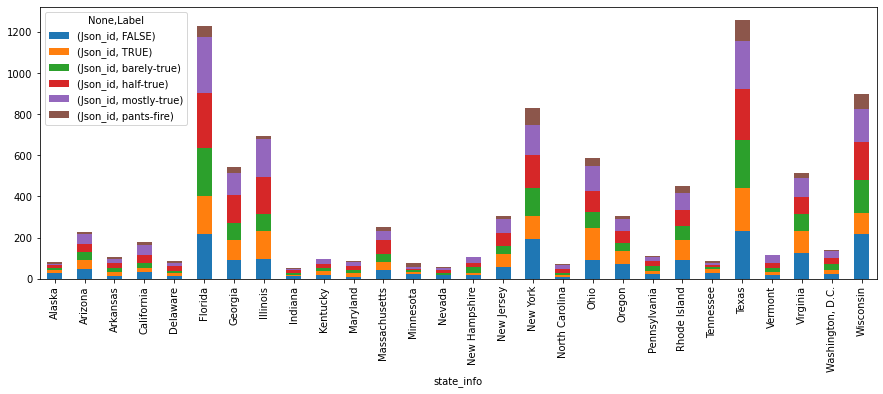

In [124]:
#State
def by_label(df, column):
    return df.groupby([column,"Label"]).agg({"Json_id" : "count"})

state_cts = df.groupby("state_info").statement.count()
state = state_cts[state_cts > 50]
state.pop('Others')
state_df = df[df['state_info'].isin(state.keys())]

breakdown = by_label(state_df, 'state_info')
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(15,5))

In [125]:
df['state_info'] = df['state_info'].apply(lambda x : x if x in state.keys() else 'other')

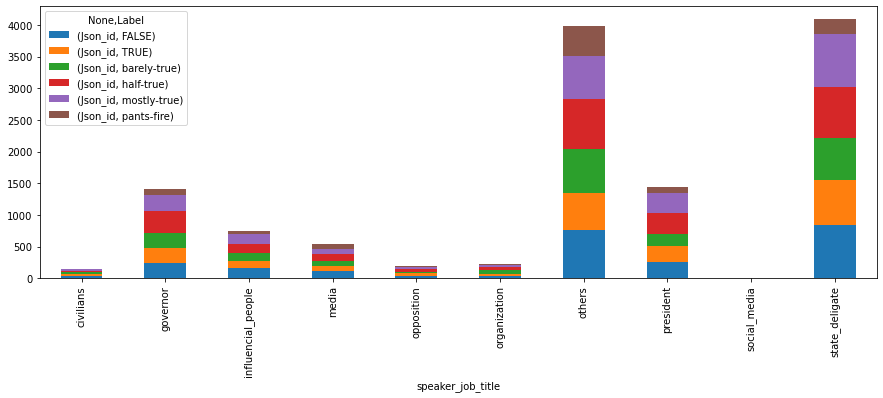

In [126]:
#speaker_job_title

state = df.groupby("speaker_job_title").statement.count()
#state.pop('Others')
state_df = df[df['speaker_job_title'].isin(state.keys())]

breakdown = by_label(state_df, 'speaker_job_title')
breakdown.unstack().plot(kind='bar', stacked=True, figsize=(15,5))

In [127]:
#numbers in statement



In [128]:
#Labels=df['Label']
#from sklearn.preprocessing import OrdinalEncoder
#Labels = pd.DataFrame(OrdinalEncoder().fit_transform(Labels.to_numpy().reshape(-1,1)))
#print(OrdinalEncoder().inverse_transform([1])) 

from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()

df["party"] = lbl_enc.fit_transform(df.party_affiliation.values)
df["state"] = lbl_enc.fit_transform(df.state_info.values)
df["speaker_l"] = lbl_enc.fit_transform(df.speaker.values)
#y = lbl_enc.fit_transform(df.Label.values)
#print(*lbl_enc.inverse_transform([0,1,2,3,4,5])) 

df.drop('party_affiliation', axis = 1, inplace = True)
df.drop('state_info', axis = 1, inplace = True)
df.drop('speaker', axis = 1, inplace = True)
df.drop('Label', axis = 1, inplace = True)
df.drop('Json_id', axis = 1, inplace = True)



In [129]:
df["speaker_job_title_1"] = lbl_enc.fit_transform(df.speaker_job_title.values)
df.drop('speaker_job_title', axis = 1, inplace = True)

In [130]:
# Merging statement and description
df['statement']= df.statement + ' '+df.Description

#### CREATING FEATURE FOR SENTIMENT

In [131]:
from textblob import TextBlob

def textsenti(sentence):
    testimonial = TextBlob(sentence)
    return(testimonial.sentiment.polarity)

def textsubj(sentence):
    testimonial = TextBlob(sentence)
    return(testimonial.sentiment.subjectivity)

df['sentiment']= df.statement.apply(textsenti)
df['subjectivity']= df.statement.apply(textsubj)


In [132]:
df_lexicon = pd.read_csv(r'C:\Users\vivek\fake_news\NRC_emotion_lexicon_list.txt', names=['word','emotion','value'], header=None, delimiter='\t')

emolex_dic = {}
for i in range(len(df_lexicon)):
    word = df_lexicon['word'][i]
    emotion = df_lexicon['emotion'][i]
    value = df_lexicon['value'][i]
    if word not in emolex_dic:
        emolex_dic[word] = {}
    emolex_dic[word][emotion] = value
    
emolex_train = []
for i in range(len(df['statement'])):
    temp = df['statement'][i].lower().split()
    temp2 = np.zeros(10,dtype=int)
    for j in range(len(temp)):
        if temp[j] in emolex_dic:
            temp2 += np.array(list(emolex_dic[temp[j]].values()))
    emolex_train.append(list(temp2))

In [133]:
emolex_train_df = pd.DataFrame(emolex_train)
emolex_train_df.columns = ["e1", "e2", "e3", "e4", "e5", "e6", "e7", "e8", "e9", "e10"]

In [134]:
emolex_train_df

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10
0,2,4,0,0,4,6,4,3,3,4
1,1,9,1,1,2,2,8,1,0,4
2,4,5,1,2,5,7,9,6,5,7
3,0,4,1,1,4,1,9,0,0,4
4,1,4,0,0,2,2,4,1,0,4
...,...,...,...,...,...,...,...,...,...,...
12786,0,3,1,0,0,2,2,0,0,3
12787,1,5,0,3,0,2,4,2,4,3
12788,0,2,1,0,0,1,0,0,0,0
12789,0,5,0,0,0,1,4,0,0,5


### TF-IDF vectorization

In [135]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv =TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X_statement = cv.fit_transform(df["statement"]).toarray()
X_statement.shape
X_statement

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### taking that array into dataframe


In [136]:
# taking that array into dataframe
X_df_statement = pd.DataFrame(X_statement, columns=cv.get_feature_names())

In [137]:
#Count vectorzer for subject and contecxt

X_subject_data = cv.fit_transform(df["subject_data"]).toarray()
X_df_subject_data = pd.DataFrame(X_subject_data, columns=cv.get_feature_names())
X_df_subject_data.head()

X_Context = cv.fit_transform(df["Context(value/location)"]).toarray()
X_df_Context = pd.DataFrame(X_Context, columns=cv.get_feature_names())

In [138]:
X_df = pd.concat([X_df_statement, X_df_subject_data, X_df_Context], axis=1, sort=False)
X_df.shape

(12791, 12829)

In [139]:
#Adding features to new dataframe
#remove it
'''
column_names_to_normalize = ['party', 'state', 'speaker_l']
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
X_df[column_names_to_normalize] = df_temp

'''
df=pd.concat([df,emolex_train_df],axis=1, sort=False)
df

,statement,subject_data,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location),Description,party,state,speaker_l,speaker_job_title_1,sentiment,subjectivity,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10
0,say anni list polit group support third trimes...,abortion,0.0,1.0,0.0,0.0,0.0,mailer,premis fail back anni list make bone comfort c...,3,23,20,9,0.057143,0.357143,2,4,0,0,4,6,4,3,3,4
1,declin coal start start natur ga took start be...,energy history job-accomplishments,0.0,0.0,1.0,1.0,0.0,floor speech,surovel said declin coal start natur ga took s...,0,25,20,9,0.000000,0.000000,1,9,1,1,2,2,8,1,0,4
2,hillari clinton agre john mccain vote give geo...,foreign-policy,70.0,71.0,160.0,163.0,9.0,denver,obama said would vote amend present though cli...,0,7,0,7,0.083333,0.166667,4,5,1,2,5,7,9,6,5,7
3,health care reform legisl like mandat free sex...,health-care,7.0,19.0,3.0,5.0,44.0,news releas,releas may point mikulski comment could open d...,1,28,2,6,0.126190,0.550000,0,4,1,1,4,1,9,0,0,4
4,econom turnaround start end term crist said ec...,economy jobs,15.0,9.0,20.0,19.0,2.0,interview cnn,crist said econom turnaround start end term cr...,0,5,4,6,0.050000,0.533333,1,4,0,0,2,2,4,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,first time decad import account less half oil ...,energy oil-spill trade,70.0,71.0,160.0,163.0,9.0,press confer,percent u oil import came persian gulf obama s...,0,7,0,7,-0.053571,0.146429,0,3,1,0,0,2,2,0,0,3
12787,say donald trump bankrupt compani twice four t...,candidates-biography,40.0,29.0,69.0,76.0,7.0,speech economi,clinton said trump bankrupt compani twice four...,0,16,8,7,0.031250,0.300000,1,5,0,3,0,2,4,2,4,3
12788,john mccain georg bush absolut plan univers he...,health-care,0.0,1.0,0.0,2.0,0.0,televis ad,think mandat everi american health insur think...,1,26,20,6,0.000000,0.000000,0,2,1,0,0,1,0,0,0,0
12789,new poll show percent support presid plan refo...,health-care,1.0,4.0,4.0,1.0,0.0,internet ad,poll say sever day publish item new york time ...,1,28,20,6,-0.007955,0.345985,0,5,0,0,0,1,4,0,0,5


In [140]:
#Adding features to new dataframe and normalizating

Credit= ((df['Barely_true_count'] * 0.75) + (df['False_count'] * 0.9) + (df['Half_true_count'] * 0.5) +(df['Mostly_true_count'] * 0.2) + (df['Fire_counts'] * 1))
total= df['Barely_true_count']+df['False_count'] +df['Half_true_count'] +df['Mostly_true_count'] + df['Fire_counts']
df["credit"]= Credit/total

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_names_to_normalize = ["e1", "e2", "e3", "e4", "e5", "e6", "e7", "e8", "e9", "e10",'sentiment', 'subjectivity','credit','speaker_job_title_1','party', 'state', 'speaker_l']
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
X_df[column_names_to_normalize] = df_temp




'''
X_df['speaker_job_title_1']=df['speaker_job_title_1']
X_df['sentiment']=df['sentiment']
X_df['subjectivity']=df['subjectivity'] #need to be normalized

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

column_names_to_normalize = ['speaker_job_title_1']
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
X_df[column_names_to_normalize] = df_temp
'''

"\nX_df['speaker_job_title_1']=df['speaker_job_title_1']\nX_df['sentiment']=df['sentiment']\nX_df['subjectivity']=df['subjectivity'] #need to be normalized\n\nfrom sklearn import preprocessing\nmin_max_scaler = preprocessing.MinMaxScaler()\n\ncolumn_names_to_normalize = ['speaker_job_title_1']\nx = df[column_names_to_normalize].values\nx_scaled = min_max_scaler.fit_transform(x)\ndf_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)\nX_df[column_names_to_normalize] = df_temp\n"

In [141]:
X_df.credit.isnull().sum(axis=0)
X_df.fillna(0.0, inplace = True) 

In [142]:
unscaled = min_max_scaler.inverse_transform(x_scaled)
unscaled[2][3]


2.0

In [143]:
X_df.head()

,abbott,abbott said,abc,abel,abil,abl,abolish,abort,abort right,abroad,absenc,absolut,abus,academ,accept,access,accid,accident,accomplish,accord,accord feder,accord recent,accord state,account,account offic,...,youtub attack,youtub campaign,youtub celebr,youtub com,youtub debat,youtub radio,youtub video,zach,zach galifianaki,zakaria,zakaria gp,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,subjectivity,speaker_job_title_1,party,speaker_l
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362628,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,0.068966,0.000000,0.000000,0.105263,0.096774,0.04,0.057692,0.1875,0.045455,0.357143,1.000000,1.000000,0.689655
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.155172,0.055556,0.041667,0.052632,0.032258,0.08,0.019231,0.0000,0.045455,0.000000,1.000000,0.000000,0.689655
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173913,0.086207,0.055556,0.083333,0.131579,0.112903,0.09,0.115385,0.3125,0.079545,0.166667,0.777778,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.068966,0.055556,0.041667,0.105263,0.016129,0.09,0.000000,0.0000,0.045455,0.550000,0.666667,0.333333,0.068966
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.104029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.068966,0.000000,0.000000,0.052632,0.032258,0.04,0.019231,0.0000,0.045455,0.533333,0.666667,0.000000,0.137931


In [144]:
X_df = X_df.loc[:,~X_df.columns.duplicated()]


In [145]:
## train test split
from sklearn.model_selection import train_test_split
steps = 25000
X_train,X_test,Y_train,Y_test = train_test_split(X_df, y, test_size=0.1,shuffle = False)

In [146]:
X_train.head()

,abbott,abbott said,abc,abel,abil,abl,abolish,abort,abort right,abroad,absenc,absolut,abus,academ,accept,access,accid,accident,accomplish,accord,accord feder,accord recent,accord state,account,account offic,...,youtub attack,youtub campaign,youtub celebr,youtub com,youtub debat,youtub radio,youtub video,zach,zach galifianaki,zakaria,zakaria gp,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,subjectivity,speaker_job_title_1,party,speaker_l
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362628,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,0.068966,0.000000,0.000000,0.105263,0.096774,0.04,0.057692,0.1875,0.045455,0.357143,1.000000,1.000000,0.689655
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.155172,0.055556,0.041667,0.052632,0.032258,0.08,0.019231,0.0000,0.045455,0.000000,1.000000,0.000000,0.689655
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173913,0.086207,0.055556,0.083333,0.131579,0.112903,0.09,0.115385,0.3125,0.079545,0.166667,0.777778,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.068966,0.055556,0.041667,0.105263,0.016129,0.09,0.000000,0.0000,0.045455,0.550000,0.666667,0.333333,0.068966
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.104029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.068966,0.000000,0.000000,0.052632,0.032258,0.04,0.019231,0.0000,0.045455,0.533333,0.666667,0.000000,0.137931


In [147]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [149]:
model = MultinomialNB(alpha=0.9)
model.fit(X_train,Y_train )
pred = model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.258


In [150]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
model1 = LinearSVC(random_state=0, tol=1e-5)
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,0.5,1,10]}
clf = GridSearchCV(model1, parameters, cv=5)
model1.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [151]:
pred1 = model1.predict(X_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

accuracy:   0.290


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model1 = LogisticRegression()
parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(model1, parameters, cv=10)
model1.fit(X_train,Y_train)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
pred1 = model1.predict(X_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

accuracy:   0.330


In [155]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100,criterion='gini',  random_state = 42)
model1.fit(X_train,Y_train)
pred1 = model1.predict(X_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

accuracy:   0.377


In [159]:
import xgboost as xgb
model1=xgb.XGBClassifier(objective='multi:softmax',random_state=1,learning_rate=0.01)
model1.fit(X_train,Y_train)

accuracy:   0.402


In [ ]:
pred1 = model1.predict(X_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

In [157]:
from sklearn.neural_network import MLPClassifier

mlpclf2 = clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,), random_state=1)
mlpclf2.fit(X_train,Y_train)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [158]:
pred1 = mlpclf2.predict(X_test)
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)

accuracy:   0.309


model.coef_[0]

In [160]:
model.coef_[0]

array([ -9.65644258, -10.05144823,  -9.57052246, ...,  -3.25007835,
        -3.5967795 ,  -3.37639489])

In [161]:
#top list of fake words used
feature_names = cv.get_feature_names()
sorted(zip(model.coef_[0], feature_names))[:5000]

[(-10.516207130405082, 'ad campaign'),
 (-10.516207130405082, 'afford'),
 (-10.516207130405082, 'breakfast texa'),
 (-10.516207130405082, 'broadcast nbc'),
 (-10.516207130405082, 'broadcast sean'),
 (-10.516207130405082, 'budget speech'),
 (-10.516207130405082, 'busi news'),
 (-10.516207130405082, 'came'),
 (-10.516207130405082, 'campaign advertis'),
 (-10.516207130405082, 'center'),
 (-10.516207130405082, 'chain'),
 (-10.516207130405082, 'chairwoman'),
 (-10.516207130405082, 'cnn lead'),
 (-10.516207130405082, 'cnn new'),
 (-10.516207130405082, 'column'),
 (-10.516207130405082, 'comment televis'),
 (-10.516207130405082, 'debat arizona'),
 (-10.516207130405082, 'debat austin'),
 (-10.516207130405082, 'debat boca'),
 (-10.516207130405082, 'debat boulder'),
 (-10.516207130405082, 'debt'),
 (-10.516207130405082, 'decis point'),
 (-10.516207130405082, 'democrat parti'),
 (-10.516207130405082, 'derri'),
 (-10.516207130405082, 'editori cartoon'),
 (-10.516207130405082, 'educ commission'),
 (

In [164]:
## confusion matrix

from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,precision_recall_fscore_support
confMatrix = confusion_matrix(Y_test,pred1)
accuracy_noun = accuracy_score(Y_test,pred1)
precision_recall_fscore = precision_recall_fscore_support(Y_test,pred1)

print(" Accurracy {} \n Precision_recall \n {} \n confusion matrix \n {} ".format(accuracy_noun,precision_recall_fscore,confMatrix))
print(" \n")
# Print the confusion matrix
print(metrics.confusion_matrix(Y_test, pred1))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, pred1, digits=3))

 Accurracy 0.40234375 
 Precision_recall 
 (array([0.35365854, 0.3575    , 0.37308869, 0.55813953, 0.70149254,
       0.39622642]), array([0.17159763, 0.56972112, 0.49392713, 0.20338983, 0.40869565,
       0.48091603]), array([0.2310757 , 0.43932412, 0.42508711, 0.29813665, 0.51648352,
       0.43448276]), array([169, 251, 247, 236, 115, 262], dtype=int64)) 
 confusion matrix 
 [[ 29  65  32   8   0  35]
 [ 35 143  41   6   3  23]
 [  7  79 122   6   0  33]
 [  3  57  58  48   3  67]
 [  0  15  15   4  47  34]
 [  8  41  59  14  14 126]] 
 

[[ 29  65  32   8   0  35]
 [ 35 143  41   6   3  23]
 [  7  79 122   6   0  33]
 [  3  57  58  48   3  67]
 [  0  15  15   4  47  34]
 [  8  41  59  14  14 126]]
              precision    recall  f1-score   support

           1      0.354     0.172     0.231       169
           2      0.357     0.570     0.439       251
           3      0.373     0.494     0.425       247
           4      0.558     0.203     0.298       236
           5      

In [163]:
distance= abs(pred1 - Y_test)
distance1= np.array(distance)
distance1= 5 - distance1
accuracy=(np.sum(distance1)/(5 * len(distance)))
accuracy

0.75484375

In [74]:
#NORMALISED DATA
# so first on all un normazied then then then matched
i=0
for prediction, label in zip(pred, Y_test):
    i=i+1
    if (prediction == label) and label ==5:
        #speaker=int(X_train.iloc[i,7236])
        #Unnormalization
        unscaled = min_max_scaler.inverse_transform(x_scaled)
        unscaled[i][3]
        print(*lbl_enc.inverse_transform([int(unscaled[i][3])])) 

state_deligate
state_deligate
state_deligate
state_deligate
others
state_deligate
others
president
others


In [75]:
#For UN-normalized 
i=0
for prediction, label in zip(pred, Y_test):
    i=i+1
    if (prediction != label) and label ==1:
        speaker=int(X_train.iloc[i,7235])
        print(*lbl_enc.inverse_transform([speaker])) 
        #print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)  

civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians
civilians


Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories. The kappa score measures the degree of agreement between the two evaluators (true values and the predicted values), which we use as the classifier’s performance.

Kappa score considers how much better the agreements are over and beyond chance agreements.It uses the expected proportion of chance agreements called ChanceAgree.

KappaScore=(Agree-ChanceAgree)/(1-ChanceAgree)



KAppa Cohen's:
According to Cohen's original article, values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

In [76]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
cohen_kappa_score(Y_test, pred1)

0.2556383859542617